In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from skmultiflow.trees import HoeffdingTree
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess data
fake_news = "C:/Users/Kartik Gounder/Desktop/Projects/Fake News Origin Detector/Fake News Detection/Dataset/archive (2)/Fake.csv"
true_news = "C:/Users/Kartik Gounder/Desktop/Projects/Fake News Origin Detector/Fake News Detection/Dataset/archive (2)/True.csv"
true_df = pd.read_csv(fake_news)
fake_df = pd.read_csv(true_news)


In [4]:
true_df["label"] = 1  # 1 for true news
fake_df["label"] = 0  # 0 for fake news
combined_df = pd.concat([true_df, fake_df], ignore_index=True)
combined_df = combined_df.sample(frac=1, random_state=43).reset_index(drop=True)

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_df['text'], combined_df['label'], test_size=0.2, random_state=43)

In [6]:
y_test

31481    1
25743    0
12048    1
17015    0
9241     0
        ..
29319    0
28889    0
44548    1
21185    1
44539    0
Name: label, Length: 8980, dtype: int64

In [7]:
type(y_test)

pandas.core.series.Series

In [8]:
type(combined_df)

pandas.core.frame.DataFrame

In [9]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
# Train Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(random_state=42)
pac.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(random_state=42)

In [11]:
# Train SGD Classifier
sgd = SGDClassifier(loss='log_loss', random_state=42)
sgd.fit(X_train_tfidf, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [12]:
ht = HoeffdingTree()
for i in range(len(combined_df)):
    text = combined_df.loc[i, 'text']
    label = combined_df.loc[i, 'label']
    X_partial = vectorizer.transform([text]).toarray()[0]
    ht.partial_fit([X_partial], [int(label)])

c:\Users\Kartik Gounder\Desktop\Projects\.venv\Lib\site-packages\skmultiflow\trees\hoeffding_tree.py:32: FutureWarning: 'HoeffdingTree' has been renamed to 'HoeffdingTreeClassifier' in v0.5.0.
The old name will be removed in v0.7.0
  warnings.warn("'HoeffdingTree' has been renamed to 'HoeffdingTreeClassifier' in v0.5.0.\n"
c:\Users\Kartik Gounder\Desktop\Projects\.venv\Lib\site-packages\skmultiflow\bayes\utils.py:39: RuntimeWarning: overflow encountered in scalar multiply
  tmp = votes[class_index] * obs.probability_of_attribute_value_given_class(
c:\Users\Kartik Gounder\Desktop\Projects\.venv\Lib\site-packages\skmultiflow\bayes\utils.py:39: RuntimeWarning: invalid value encountered in scalar multiply
  tmp = votes[class_index] * obs.probability_of_attribute_value_given_class(


In [13]:
# Get predictions
pac_pred = pac.predict(X_test_tfidf)
sgd_pred = sgd.predict(X_test_tfidf)
ht_pred = ht.predict(X_test_tfidf.toarray())

c:\Users\Kartik Gounder\Desktop\Projects\.venv\Lib\site-packages\skmultiflow\utils\utils.py:62: RuntimeWarning: invalid value encountered in scalar divide
  dictionary[key] = value / factor


In [14]:
# Concatenate predictions as features
X_test_features = pd.DataFrame({'PAC': pac_pred, 'SGD': sgd_pred, 'HT' :  ht_pred})

In [15]:
# Train Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_test_features, y_test)

GradientBoostingClassifier()

In [16]:
# Get final predictions
final_pred = gb.predict(X_test_features)

In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_test, final_pred)
print("Final accuracy:", accuracy)

Final accuracy: 0.9953229398663697


In [18]:
accuracy = accuracy_score(y_test, pac_pred)
print("Final accuracy PAC:", accuracy)
accuracy = accuracy_score(y_test, ht_pred)
print("Final accuracy HC:", accuracy)
accuracy = accuracy_score(y_test, sgd_pred)
print("Final accuracy SDG:", accuracy)

Final accuracy PAC: 0.9929844097995546
Final accuracy HC: 0.9917594654788419
Final accuracy SDG: 0.9787305122494432


In [19]:
# Print confusion matrices
print("Confusion Matrix for PAC:")
print(confusion_matrix(y_test, pac_pred))
print()

print("Confusion Matrix for SGD:")
print(confusion_matrix(y_test, sgd_pred))
print()

print("Confusion Matrix for HT:")
print(confusion_matrix(y_test, ht_pred))
print()

print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test, final_pred))
print()

Confusion Matrix for PAC:
[[4176   31]
 [  32 4741]]

Confusion Matrix for SGD:
[[4138   69]
 [ 122 4651]]

Confusion Matrix for HT:
[[4201    6]
 [  68 4705]]

Confusion Matrix for Gradient Boosting Classifier:
[[4181   26]
 [  16 4757]]



In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [21]:
confusion_matrix = metrics.confusion_matrix(y_test, final_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

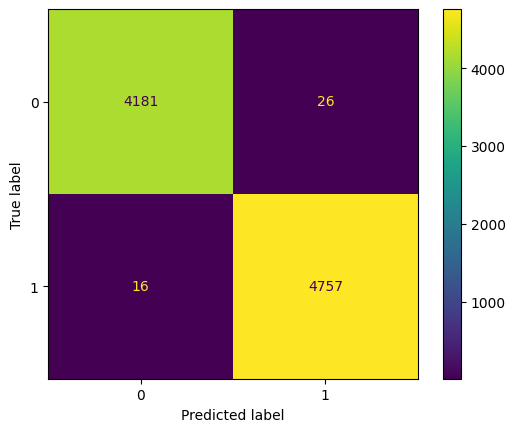

In [22]:
cm_display.plot()
plt.show()

In [23]:
Accuracy = metrics.accuracy_score(y_test, final_pred)
Precision = metrics.precision_score(y_test, final_pred)
Sensitivity_recall = metrics.recall_score(y_test, final_pred)
Specificity = metrics.recall_score(y_test, final_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, final_pred)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.9953229398663697, 'Precision': 0.9945640811206355, 'Sensitivity_recall': 0.9966478106012989, 'Specificity': 0.993819824102686, 'F1_score': 0.9956048555881122}


In [24]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

In [25]:
# Calculate precision, recall, and F1-score for PAC
pac_precision, pac_recall, pac_f1, _ = precision_recall_fscore_support(y_test, pac_pred, average='binary')

# Calculate precision, recall, and F1-score for SGD
sgd_precision, sgd_recall, sgd_f1, _ = precision_recall_fscore_support(y_test, sgd_pred, average='binary')

# Calculate precision, recall, and F1-score for Hoeffding Tree
ht_precision, ht_recall, ht_f1, _ = precision_recall_fscore_support(y_test, ht_pred, average='binary')

# Calculate precision, recall, and F1-score for Gradient Boosting
gb_precision, gb_recall, gb_f1, _ = precision_recall_fscore_support(y_test, final_pred, average='binary')

# Calculate accuracy for PAC, SGD, HT, and Gradient Boosting
pac_accuracy = accuracy_score(y_test, pac_pred)
sgd_accuracy = accuracy_score(y_test, sgd_pred)
ht_accuracy = accuracy_score(y_test, ht_pred)
gb_accuracy = accuracy_score(y_test, final_pred)

# Confusion matrices
pac_conf_matrix = confusion_matrix(y_test, pac_pred)
sgd_conf_matrix = confusion_matrix(y_test, sgd_pred)
ht_conf_matrix = confusion_matrix(y_test, ht_pred)
gb_conf_matrix = confusion_matrix(y_test, final_pred)

# Display results in a structured format
print("Classifier\t\tAccuracy\tPrecision\tRecall\t\tF1-Score")
print("PAC\t\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(pac_accuracy, pac_precision, pac_recall, pac_f1))
print("SGD\t\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(sgd_accuracy, sgd_precision, sgd_recall, sgd_f1))
print("Hoeffding Tree\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(ht_accuracy, ht_precision, ht_recall, ht_f1))
print("Gradient Boosting\t{:.4f}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(gb_accuracy, gb_precision, gb_recall, gb_f1))

# Display confusion matrices
print("\nConfusion Matrix for PAC:")
print(pac_conf_matrix)
print("\nConfusion Matrix for SGD:")
print(sgd_conf_matrix)
print("\nConfusion Matrix for Hoeffding Tree:")
print(ht_conf_matrix)
print("\nConfusion Matrix for Gradient Boosting:")
print(gb_conf_matrix)

Classifier		Accuracy	Precision	Recall		F1-Score
PAC			0.9930		0.9935		0.9933		0.9934
SGD			0.9787		0.9854		0.9744		0.9799
Hoeffding Tree		0.9918		0.9987		0.9858		0.9922
Gradient Boosting	0.9953		0.9946		0.9966		0.9956

Confusion Matrix for PAC:
[[4176   31]
 [  32 4741]]

Confusion Matrix for SGD:
[[4138   69]
 [ 122 4651]]

Confusion Matrix for Hoeffding Tree:
[[4201    6]
 [  68 4705]]

Confusion Matrix for Gradient Boosting:
[[4181   26]
 [  16 4757]]


In [26]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu, wilcoxon, kruskal, chi2_contingency
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [27]:
pac_metrics = [accuracy_score(y_test, pac_pred), precision_score(y_test, pac_pred), recall_score(y_test, pac_pred)]
sgd_metrics = [accuracy_score(y_test, sgd_pred), precision_score(y_test, sgd_pred), recall_score(y_test, sgd_pred)]
gb_metrics = [accuracy_score(y_test, final_pred), precision_score(y_test, final_pred), recall_score(y_test, final_pred)]
ht_metrics = [accuracy_score(y_test, ht_pred), precision_score(y_test, ht_pred), recall_score(y_test, ht_pred)]
# Convert to numpy arrays for statistical tests
pac_metrics = np.array(pac_metrics)
sgd_metrics = np.array(sgd_metrics)
gb_metrics = np.array(gb_metrics)
ht_metrics = np.array(ht_metrics)
# Mann-Whitney U Test (comparing PAC and SGD)
u_stat, u_p_value = mannwhitneyu(pac_metrics, sgd_metrics)
print(f"Mann-Whitney U Test between PAC and SGD: U-statistic={u_stat}, p-value={u_p_value}")

# Wilcoxon Signed-Rank Test (paired data between PAC and SGD)
wilcoxon_stat, wilcoxon_p_value = wilcoxon(pac_metrics, sgd_metrics)
print(f"Wilcoxon Signed-Rank Test between PAC and SGD: W-statistic={wilcoxon_stat}, p-value={wilcoxon_p_value}")

# Kruskal-Wallis Test (comparing PAC, SGD, and GB)
kruskal_stat, kruskal_p_value = kruskal(pac_metrics, sgd_metrics, gb_metrics)
print(f"Kruskal-Wallis Test for PAC, SGD, GB: K-statistic={kruskal_stat}, p-value={kruskal_p_value}")

# Chi-Square Test (Confusion matrices comparison)
pac_conf_matrix = pd.crosstab(y_test, pac_pred)
sgd_conf_matrix = pd.crosstab(y_test, sgd_pred)

chi2_stat, chi2_p_value, _, _ = chi2_contingency([pac_conf_matrix.values.flatten(), sgd_conf_matrix.values.flatten()])
print(f"Chi-Square Test between PAC and SGD confusion matrices: Chi2-statistic={chi2_stat}, p-value={chi2_p_value}")



Mann-Whitney U Test between PAC and SGD: U-statistic=9.0, p-value=0.1
Wilcoxon Signed-Rank Test between PAC and SGD: W-statistic=0.0, p-value=0.25
Kruskal-Wallis Test for PAC, SGD, GB: K-statistic=7.200000000000003, p-value=0.02732372244729252
Chi-Square Test between PAC and SGD confusion matrices: Chi2-statistic=68.07352165767695, p-value=1.1033074950591257e-14


In [28]:
# PAC vs. SGD
u_stat, u_p_value = mannwhitneyu(pac_metrics, sgd_metrics)
print(f"Mann-Whitney U Test between RoBERTa and SGD: U-statistic={u_stat}, p-value={u_p_value}")

# PAC vs. Ensemble model
u_stat, u_p_value = mannwhitneyu(pac_metrics, gb_metrics)
print(f"Mann-Whitney U Test between RoBERTa and Ensemble model: U-statistic={u_stat}, p-value={u_p_value}")

# PAC vs. Hoeffding Tree
u_stat, u_p_value = mannwhitneyu(pac_metrics, ht_metrics)
print(f"Mann-Whitney U Test between RoBERTa and Hoeffding Tree: U-statistic={u_stat}, p-value={u_p_value}")

# SGD vs. Ensemble model
u_stat, u_p_value = mannwhitneyu(sgd_metrics, gb_metrics)
print(f"Mann-Whitney U Test between SGD and Ensemble model: U-statistic={u_stat}, p-value={u_p_value}")

# SGD vs. Hoeffding Tree
u_stat, u_p_value = mannwhitneyu(sgd_metrics, ht_metrics)
print(f"Mann-Whitney U Test between SGD and Hoeffding Tree: U-statistic={u_stat}, p-value={u_p_value}")

# Ensemble model vs. Hoeffding Tree
u_stat, u_p_value = mannwhitneyu(gb_metrics, ht_metrics)
print(f"Mann-Whitney U Test between Ensemble model and Hoeffding Tree: U-statistic={u_stat}, p-value={u_p_value}")

Mann-Whitney U Test between RoBERTa and SGD: U-statistic=9.0, p-value=0.1
Mann-Whitney U Test between RoBERTa and Ensemble model: U-statistic=0.0, p-value=0.1
Mann-Whitney U Test between RoBERTa and Hoeffding Tree: U-statistic=6.0, p-value=0.7
Mann-Whitney U Test between SGD and Ensemble model: U-statistic=0.0, p-value=0.1
Mann-Whitney U Test between SGD and Hoeffding Tree: U-statistic=0.0, p-value=0.1
Mann-Whitney U Test between Ensemble model and Hoeffding Tree: U-statistic=6.0, p-value=0.7


In [30]:
kruskal_stat, kruskal_p_value = kruskal(pac_metrics, sgd_metrics, ht_metrics, gb_metrics)
print(f"Kruskal-Wallis Test for RoBERTa, SGD, HT, Ensemble Model: K-statistic={kruskal_stat}, p-value={kruskal_p_value}")


Kruskal-Wallis Test for RoBERTa, SGD, HT, Ensemble Model: K-statistic=7.61538461538462, p-value=0.05466668176935204
